In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Basic Libraries
import seaborn as sns
import pandas as pd
# Custom Libraries
from rainfall.io import load_training_data, load_test_data, save_best_model_submission
from rainfall.feat_eng import add_features, calculate_feature_importance
from rainfall.pipeline import model_selector

from rainfall.constants import MODELS, PARAM_GRIDS, RESULT_DIR

In [3]:
train_data_path = '/Users/rakurai/Documents/Github/kg-rainfall-2025/data/train.csv'
extra_train_path = '/Users/rakurai/Documents/Github/kg-rainfall-2025/data/rainfall.csv'
test_data_path = '/Users/rakurai/Documents/Github/kg-rainfall-2025/data/test.csv'

In [4]:
X, y = load_training_data(train_data_path)
Xx,yx = load_training_data(extra_train_path)
X_test, test_ids = load_test_data(test_data_path)

In [5]:
#Xx dtype to the same as X
Xx = Xx.astype(X.dtypes.to_dict())

#combine training and extra training data
Xn = pd.concat([X, Xx], axis=0)
yn = pd.concat([y, yx], axis=0)

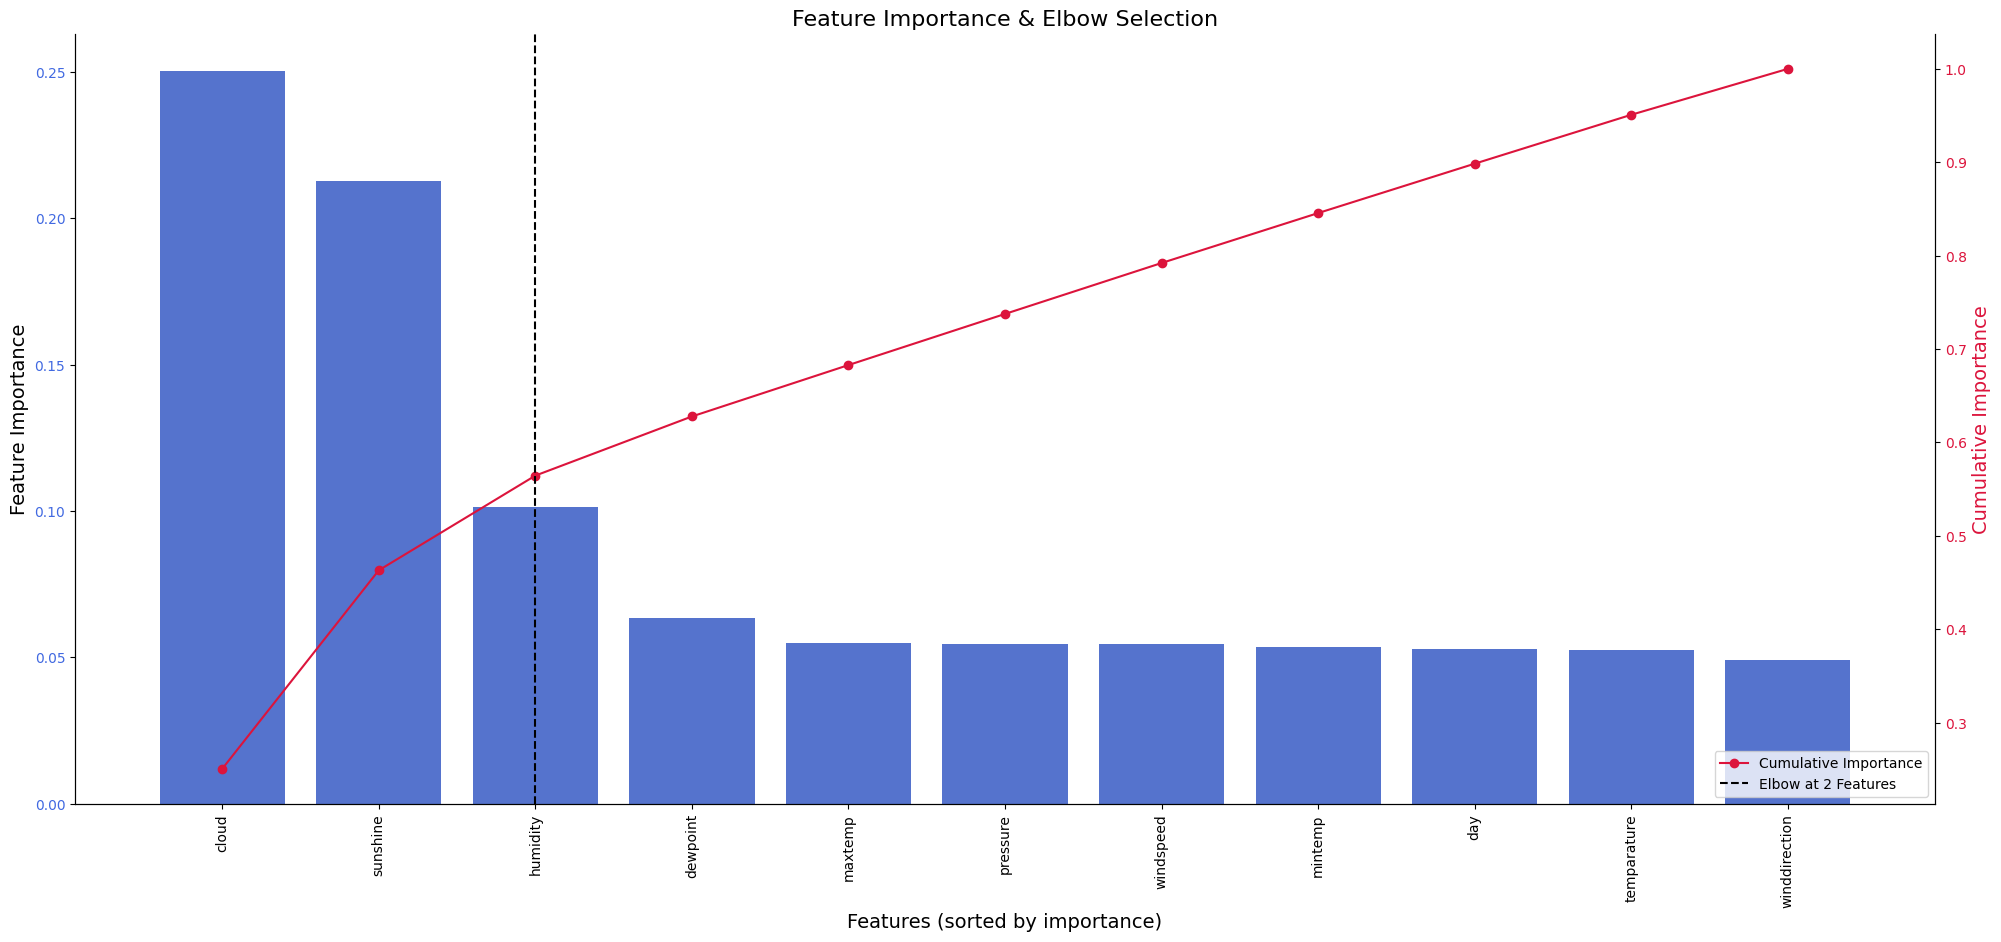

In [6]:
_, _ = calculate_feature_importance(Xn, yn, X_test) 

Features check
Optimal number of clusters: 3
Features check
Optimal number of clusters: 3
Number of features in X_aug:  63


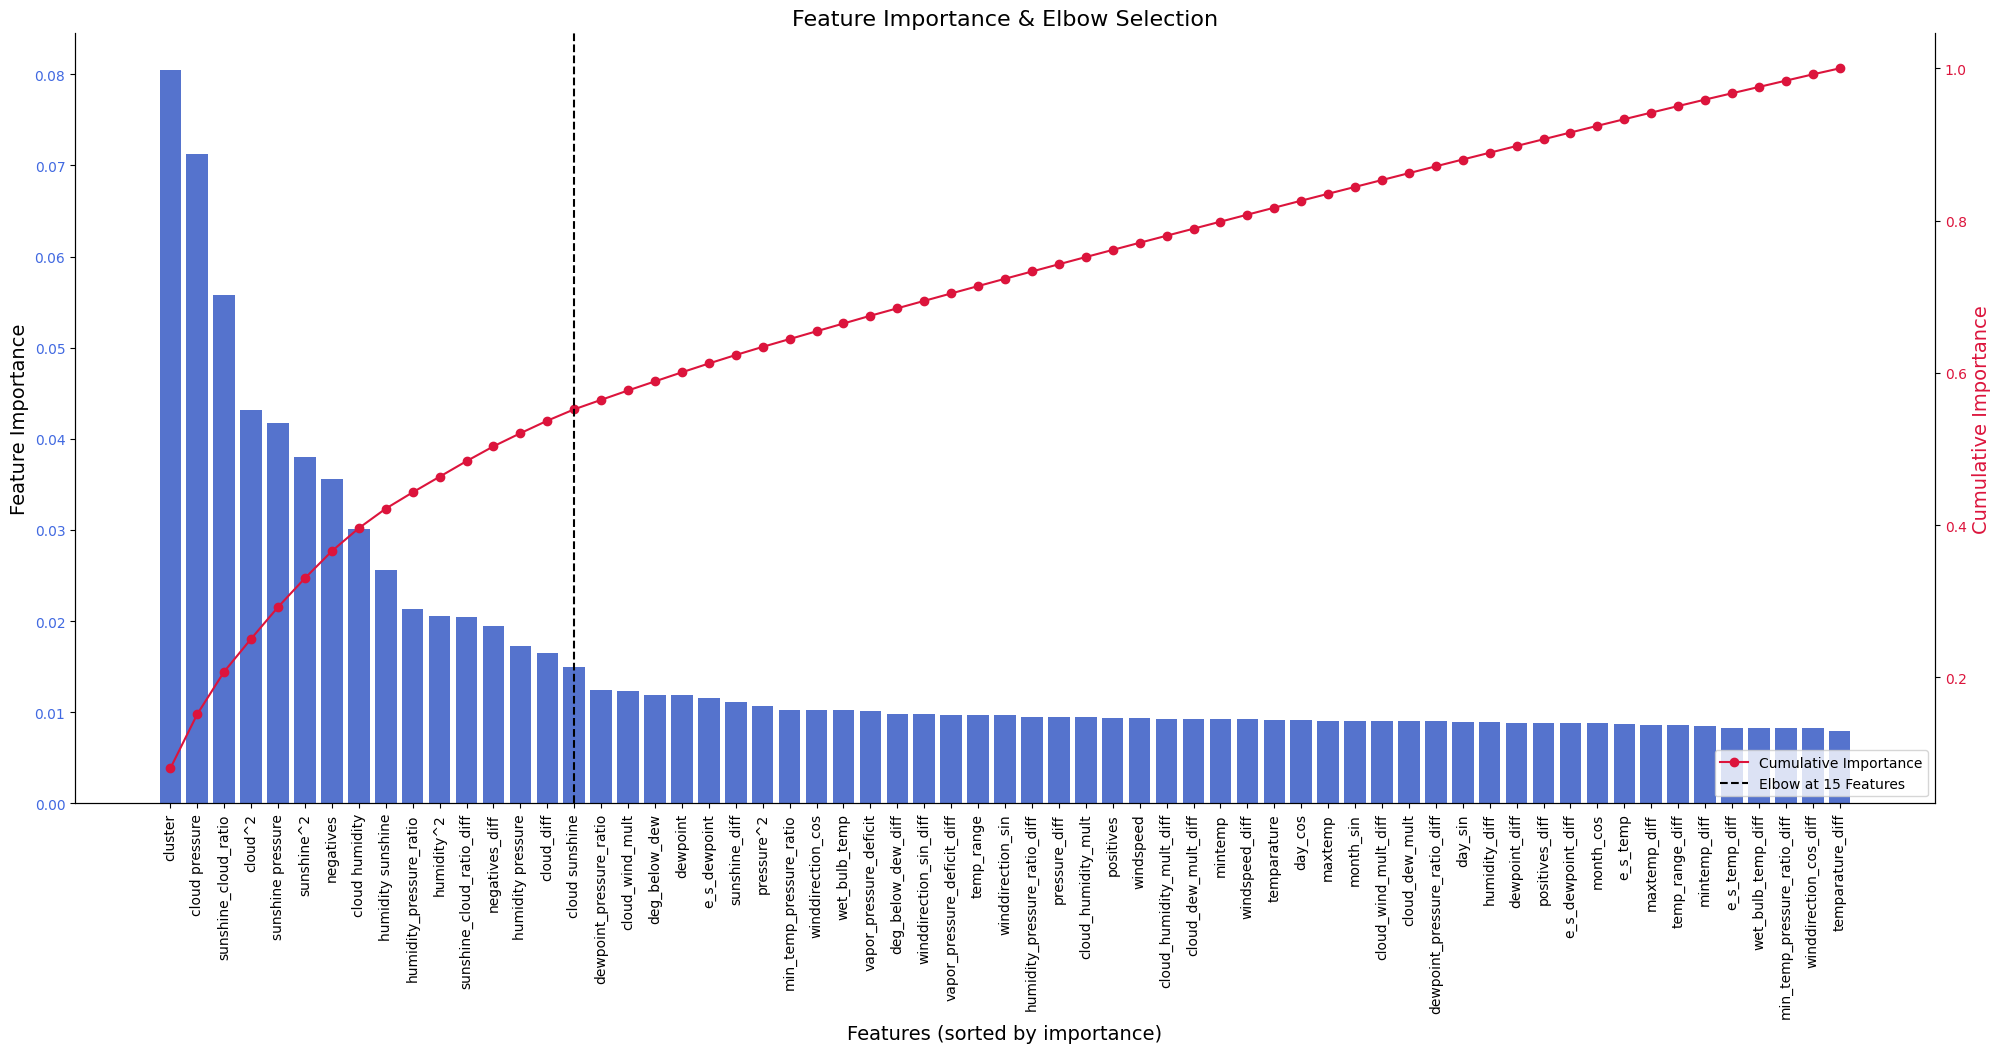

Number of selected features in X_sort:  15


In [16]:
X_aug = add_features(Xn)
X_test_aug = add_features(X_test)
print("Number of features in X_aug: ", X_aug.shape[1])
X_sort, X_test_sort = calculate_feature_importance(X_aug, yn, X_test_aug)
print("Number of selected features in X_sort: ", X_sort.shape[1])

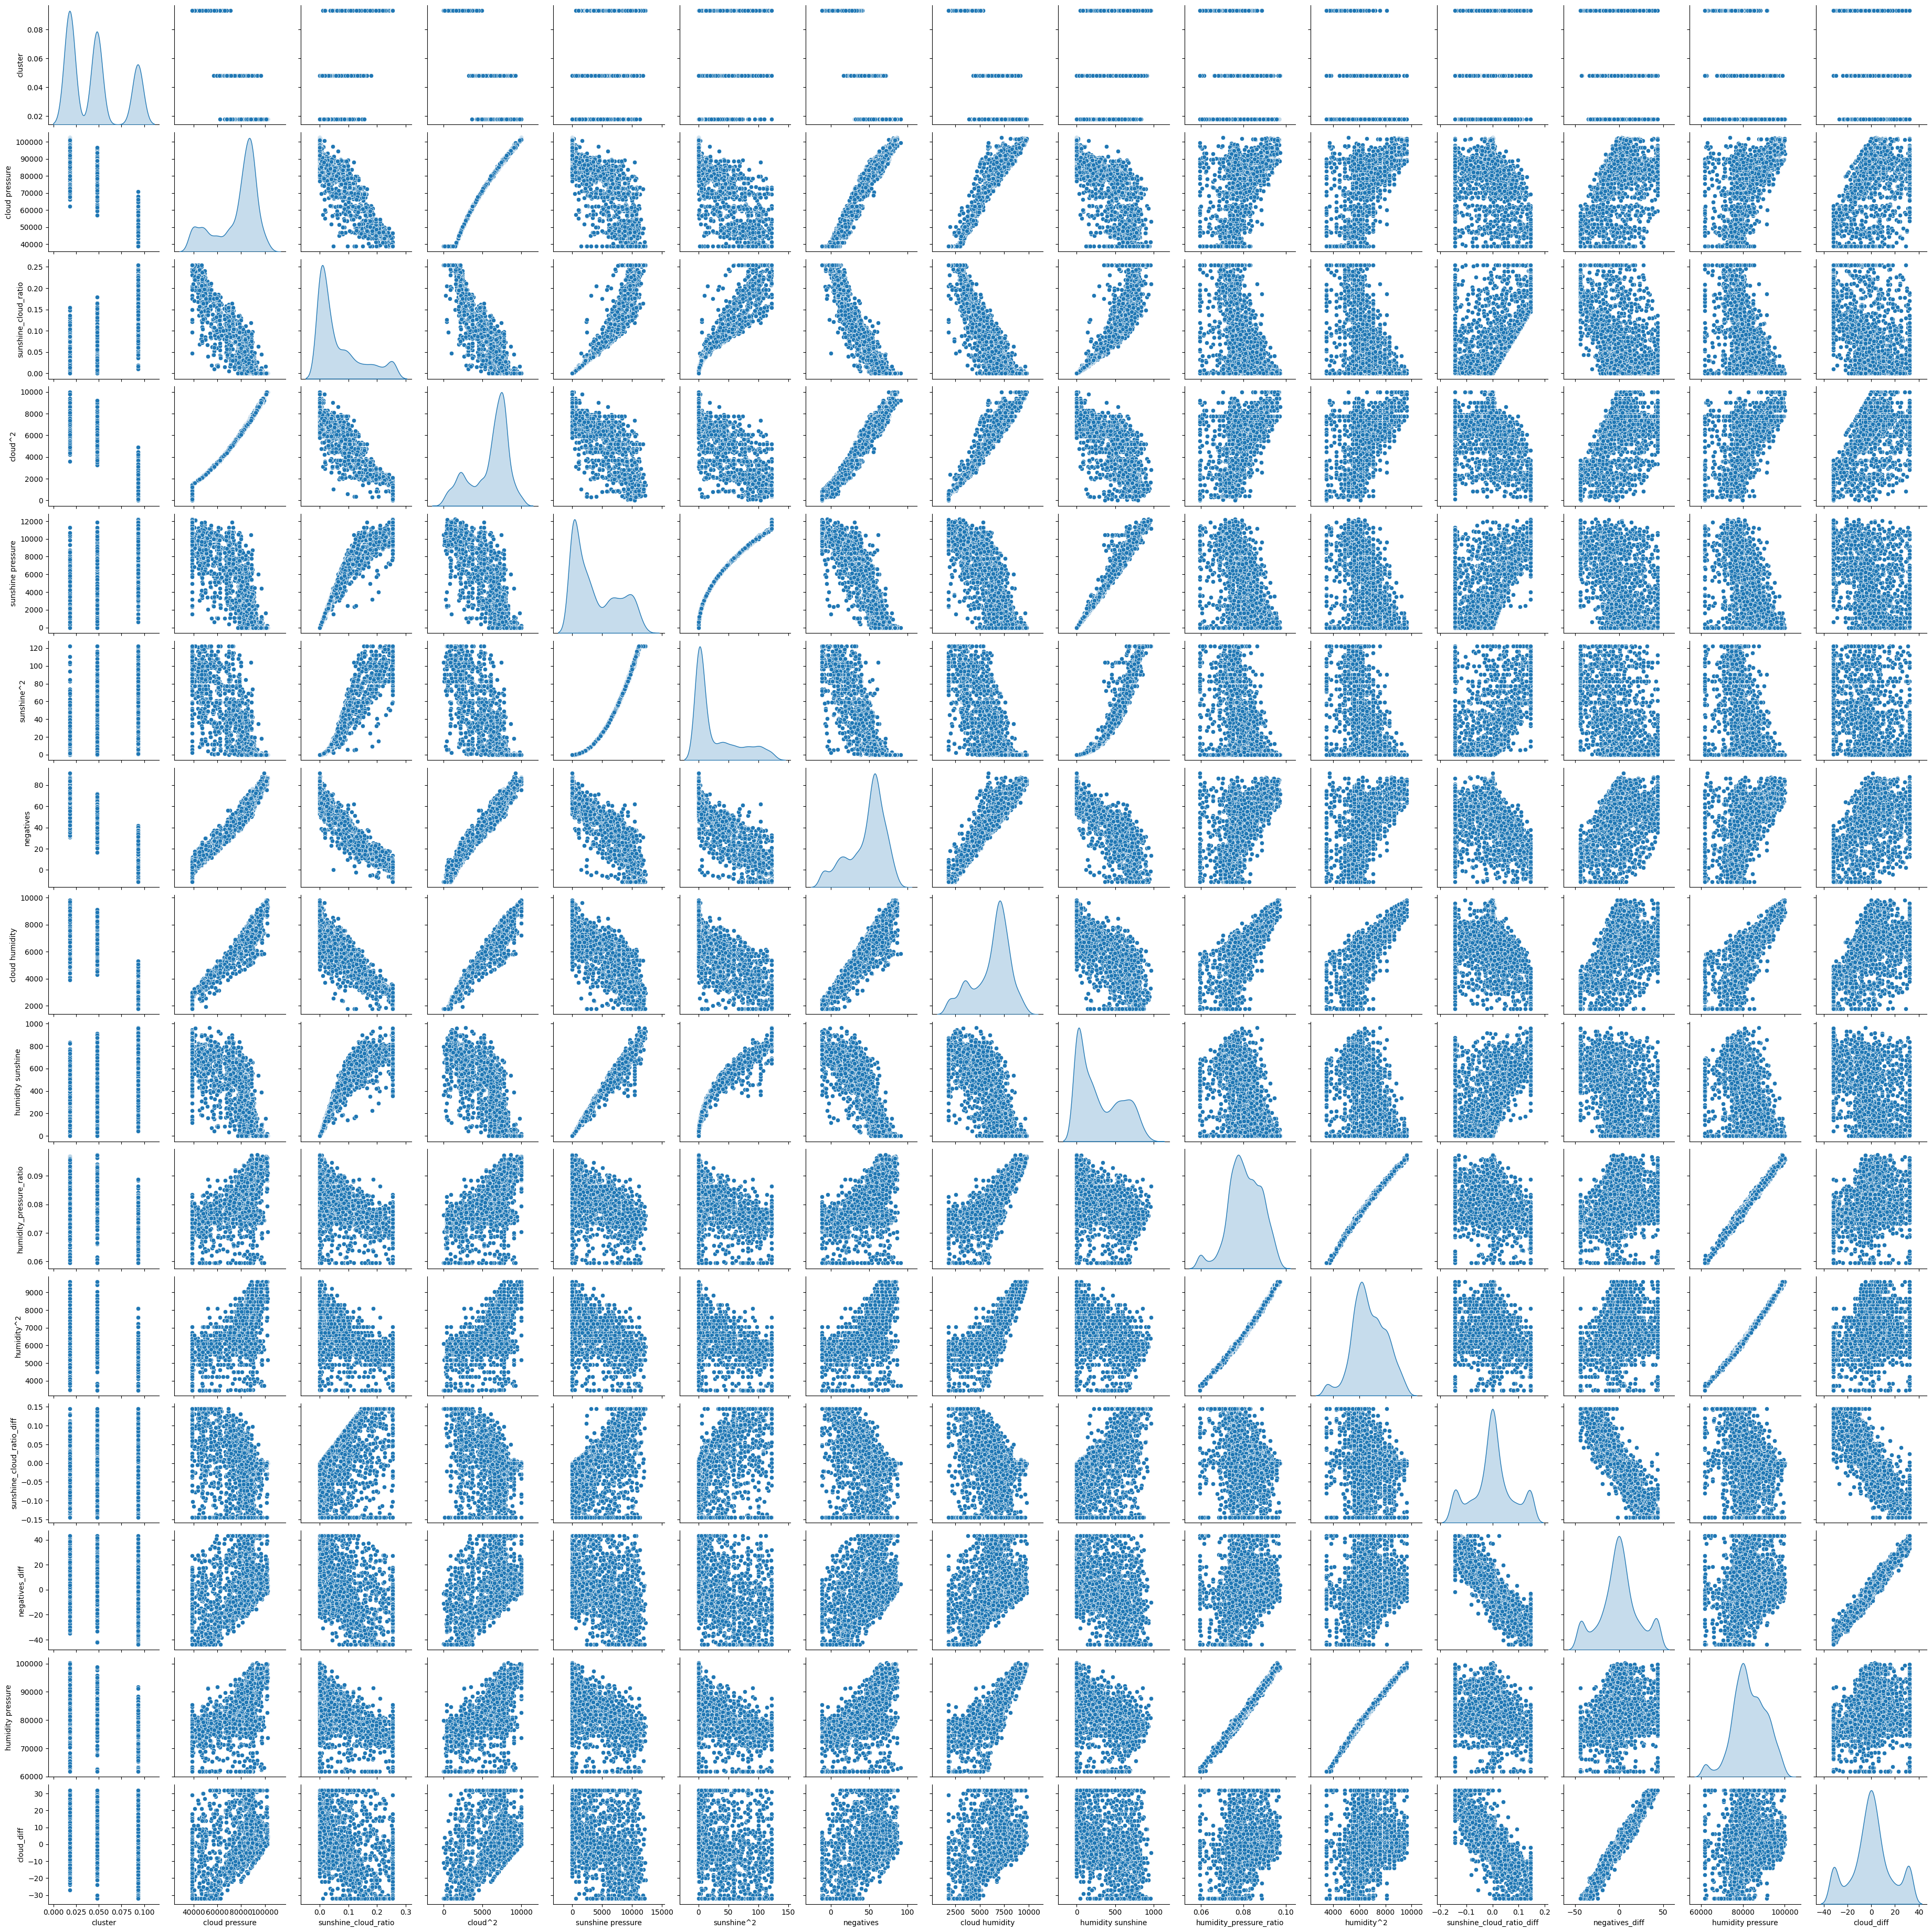

In [8]:
sns.pairplot(X_sort, diag_kind='kde')


Training LogisticRegression on Extended IQR-treated & Standard Scaled features:


/Users/rakurai/Library/Caches/pypoetry/virtualenvs/kg-rainfall-2025-cG9gBZNg-py3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best CV ROC AUC for LogisticRegression: 0.8903
Best Params: {'clf__solver': 'liblinear', 'clf__penalty': 'l1', 'clf__max_iter': 100, 'clf__C': 7.742636826811277}

Training DecisionTree on Extended IQR-treated & Standard Scaled features:
Best CV ROC AUC for DecisionTree: 0.8760
Best Params: {'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': 3, 'clf__criterion': 'entropy'}

Training ExtraTrees on Extended IQR-treated & Standard Scaled features:
Best CV ROC AUC for ExtraTrees: 0.8901
Best Params: {'clf__n_estimators': 50, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': 7}

Training RandomForest on Extended IQR-treated & Standard Scaled features:
Best CV ROC AUC for RandomForest: 0.8907
Best Params: {'clf__n_estimators': 100, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': 5}

Training XGBoost on Extended IQR-treated & Standard Scaled features:
Best CV R

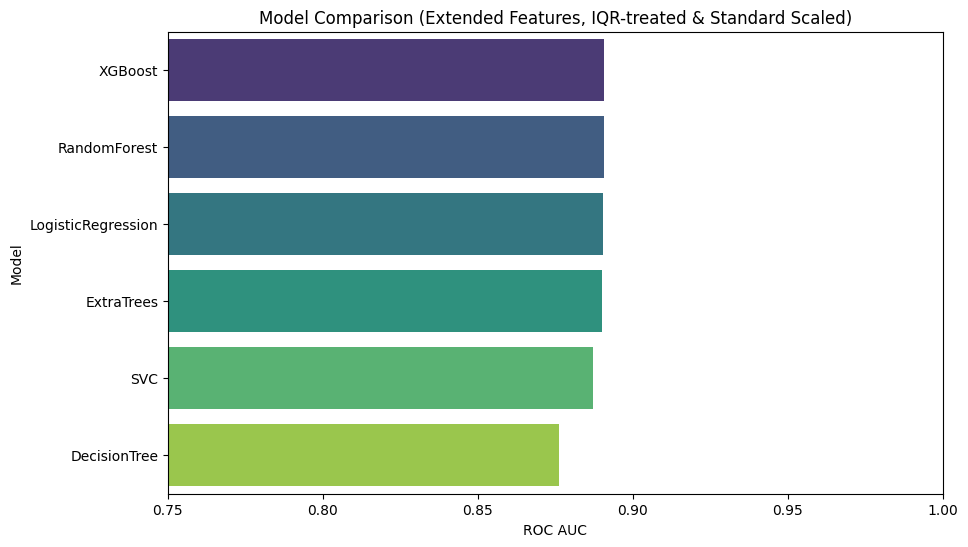

In [9]:
results = model_selector(MODELS, PARAM_GRIDS, X_sort, yn, X_test_sort, test_ids, RESULT_DIR)

In [10]:
results

{'LogisticRegression': 0.8903485957867613,
 'DecisionTree': 0.8760212087177344,
 'ExtraTrees': 0.8900642308848628,
 'RandomForest': 0.8906901442946069,
 'XGBoost': 0.8907880026317443,
 'SVC': 0.8872218838286237}

In [ ]:
save_best_model_submission(results)

Best scoring model: XGBoost: 0.8908
Copied results/XGBoost_submission.csv as 'submission.csv'

 All individual model submissions saved:
- results/LogisticRegression_submission.csv
- results/DecisionTree_submission.csv
- results/ExtraTrees_submission.csv
- results/RandomForest_submission.csv
- results/XGBoost_submission.csv
- results/CatBoost_submission.csv
- results/LGBM_submission.csv
- results/KNN_submission.csv
- results/SVC_submission.csv
